In [1]:
#-->Importing Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#-->Reading the .csv file
df = pd.read_csv("mymoviedb (1).csv", lineterminator = '\n')

In [3]:
df.head() #--> To read 5 rows of the data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
#--> Let us know its  size
print("The total Number Of Elements in the given dataset-->",df.size)
print("The Total Number of RowsXColumn in the given dataset-->",df.shape)

The total Number Of Elements in the given dataset--> 88443
The Total Number of RowsXColumn in the given dataset--> (9827, 9)


In [5]:
#--> Lets check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
#-->Check for any Duplicate data
df.duplicated().sum()

np.int64(0)

In [7]:
#--> Hence No duplicate data
#--> Now lets use the describe function
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
'''
Summary-->
no duplicate or missing values
dataframe consists of 9827 rows and 9 columns
Release date column needs to be casted into data time to extract only the year value
Overview, original language and poster url is not usefull so we will just drop them.
Genre columns has some white spaces which needs to be fixed
'''

In [8]:
#--> Lets covert release date column into date time format
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes) #-->It will give d

datetime64[ns]


In [9]:
#-->Now form the release date column we dont need the full date we just need the year so let us remove the dates and months
df["Release_Date"] = df["Release_Date"].dt.year #--> It will extract the only year from the full date
df["Release_Date"].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
#--> Work done so now lets drop the uneccessary columns
cols = ["Overview","Original_Language","Poster_Url"]
df.drop(cols,axis = 1, inplace = True)
df.columns        

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [13]:
def catigorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()["75%"],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col],edges , labels = labels, duplicates = "drop")
    return df


In [14]:
labels = {"not_popuar" , "below_average" , "average" , "popular"}
catigorize_col(df, "Vote_Average" , labels)
df["Vote_Average"].unique()

['average', 'popular', 'not_popuar', 'below_average', NaN]
Categories (4, object): ['below_average' < 'popular' < 'not_popuar' < 'average']

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,average,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,average,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,popular,Thriller
3,2021,Encanto,2402.201,5076,average,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,not_popuar,"Action, Adventure, Thriller, War"


In [16]:
#---> Let see the count of how many movies are popular or below avg etc..
df["Vote_Average"].value_counts()

Vote_Average
below_average    2467
average          2450
not_popuar       2412
popular          2398
Name: count, dtype: int64

In [17]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [20]:
#-->Modifying our dataset so that it has only one genre per row
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,level_0,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Action
1,1,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Adventure
2,2,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Science Fiction
3,3,1,2022,The Batman,3827.658,1151,average,Crime
4,4,1,2022,The Batman,3827.658,1151,average,Mystery


In [22]:
#--> Casting Genre Into category
df["Genre"] = df["Genre"].astype("category")
df["Genre"].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

THAT Was all For Data Preprocessing Now Moving forward to Data Visualization

In [23]:
df.head()

,level_0,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Action
1,1,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Adventure
2,2,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Science Fiction
3,3,1,2022,The Batman,3827.658,1151,average,Crime
4,4,1,2022,The Batman,3827.658,1151,average,Mystery


# Data Visualization

In [25]:
sns.set_style('whitegrid')

# Q1) What is the most frequent genre of movies released on NETFLIX??

In [26]:
df["Genre"].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

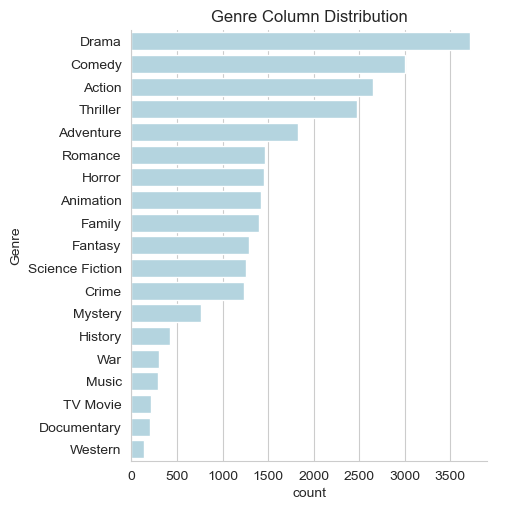

In [28]:
sns.catplot(y = "Genre", data = df ,kind='count',
            order = df['Genre'].value_counts().index,
            color = 'lightblue')
plt.title("Genre Column Distribution")
plt.show()

# Q2) Which genre has highest votes in Vote_Average column

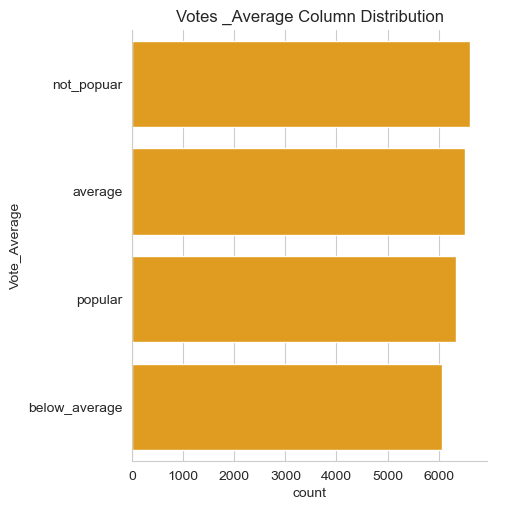

In [30]:
sns.catplot(y = "Vote_Average", data = df ,kind='count',
            order = df['Vote_Average'].value_counts().index,
            color = 'orange')
plt.title("Votes _Average Column Distribution")
plt.show()

# Q3) What movie got the highest popularity? What's its genre?

In [31]:
df[df['Popularity'] == df['Popularity'].max()]

,level_0,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,0,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Action
1,1,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Adventure
2,2,0,2021,Spider-Man: No Way Home,5083.954,8940,average,Science Fiction


# Q4) What movie got the lowest popularity? what's its genre?

In [32]:
df[df['Popularity'] == df['Popularity'].min()]

,level_0,index,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,25546,9825,2021,The United States vs. Billie Holiday,13.354,152,not_popuar,Music
25547,25547,9825,2021,The United States vs. Billie Holiday,13.354,152,not_popuar,Drama
25548,25548,9825,2021,The United States vs. Billie Holiday,13.354,152,not_popuar,History
25549,25549,9826,1984,Threads,13.354,186,average,War
25550,25550,9826,1984,Threads,13.354,186,average,Drama
25551,25551,9826,1984,Threads,13.354,186,average,Science Fiction


# Q5) Which year has most filmmed movies?

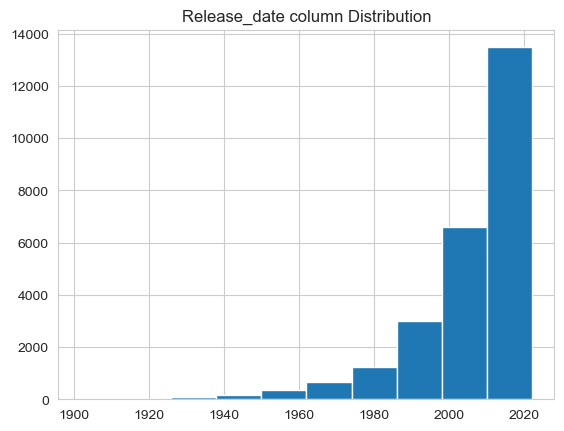

In [33]:
df['Release_Date'].hist()
plt.title("Release_date column Distribution")
plt.show()